In [1]:
#imports 
#Tirando os warnings
import warnings
warnings.filterwarnings("ignore")
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import math
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, KFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from scipy.stats import zscore
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import balanced_accuracy_score

In [2]:
# controla tamanho geral das figuras no matplotlib/seaborn
TAMANHO_GERAL = [15, 10]
plt.rcParams['figure.figsize'] = TAMANHO_GERAL
sns.set(rc={'figure.figsize' : TAMANHO_GERAL})

In [14]:

# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 
# function to print sentiments
# of the sentence.
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
     
 
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        return "Positive"
 
    elif sentiment_dict['compound'] <= - 0.05 :
         return  "Negative"
 
    else :
         return "Neutral"

In [59]:
# https://finance.yahoo.com/quote/BTC-USD/history/
dfPrice = pd.read_csv('Data/Yahoo-BTC-USD.csv')
dfPrice['Timestamp'] = pd.to_datetime(dfPrice['Date'])
dfPrice = dfPrice.set_index("Timestamp")

In [60]:
# dfPrice = dfPrice.dropna(how="any")
dfPrice = dfPrice.drop(labels = ["Date"], axis = 1)

In [61]:
dfPrice

,Open,High,Low,Close,Adj Close,Volume
Timestamp,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8.036550e+06
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7.860650e+06
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,3.305440e+07
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,5.562910e+07
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,4.396280e+07
...,...,...,...,...,...,...
2021-10-25,60893.925781,63729.324219,60691.800781,63039.824219,63039.824219,3.106491e+10
2021-10-26,63032.761719,63229.027344,59991.160156,60363.792969,60363.792969,3.487897e+10
2021-10-27,60352.000000,61435.183594,58208.187500,58482.386719,58482.386719,4.365708e+10


In [70]:
dataIni='2016-01-01'
dataFim='2019-03-29'

dfPrice = dfPrice[dataIni : dataFim] 
# dfMaxMin_perDay  = pd.concat([dfPrice.groupby("Date").max().add_suffix('_max'), dfPrice.groupby("Date").min().add_suffix('_min')], axis=1)
# dfMaxMin_perDay

In [71]:
dfMaxMin_perDay = dfPrice

In [72]:
dfMaxMin_perDay["variacao"] = ((dfMaxMin_perDay['Close'] - dfMaxMin_perDay['Open'])*100/ dfMaxMin_perDay['Open']).values
dfMaxMin_perDay 

,Open,High,Low,Close,Adj Close,Volume,variacao,Volume_btc
Timestamp,,,,,,,,
2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,3.627890e+07,0.838828,8.400217e+04
2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,3.009660e+07,-0.272425,6.935244e+04
2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,3.963380e+07,-0.822693,9.233816e+04
2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,3.847750e+07,0.704551,8.910944e+04
2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,3.452260e+07,-0.256081,7.992656e+04
...,...,...,...,...,...,...,...,...
2019-03-25,4024.112793,4038.840820,3934.031250,3963.070557,3963.070557,1.035982e+10,-1.516912,2.598767e+06
2019-03-26,3969.228760,3985.080811,3944.753174,3985.080811,3985.080811,1.070768e+10,0.399374,2.700606e+06
2019-03-27,3984.244873,4087.066162,3977.810547,4087.066162,4087.066162,1.089713e+10,2.580697,2.702368e+06


In [73]:
dfMaxMin_perDay["Volume_btc"] = dfMaxMin_perDay["Volume"] / ((dfMaxMin_perDay["High"] + dfMaxMin_perDay["Low"]) / 2)

<AxesSubplot:xlabel='Timestamp', ylabel='Close'>

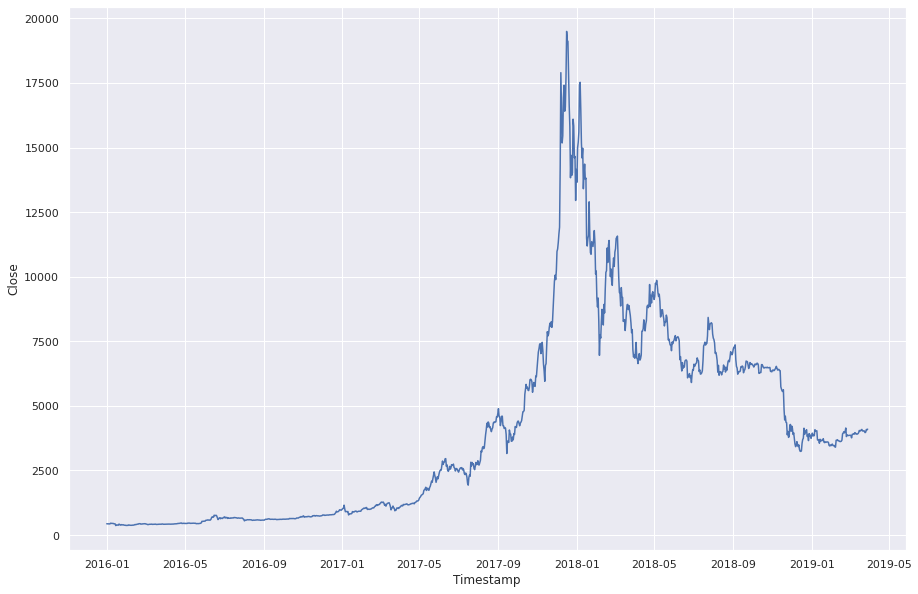

In [74]:
sns.lineplot(data = dfMaxMin_perDay, x = "Timestamp", y = "Close")

<AxesSubplot:xlabel='Volume_btc', ylabel='Volume'>

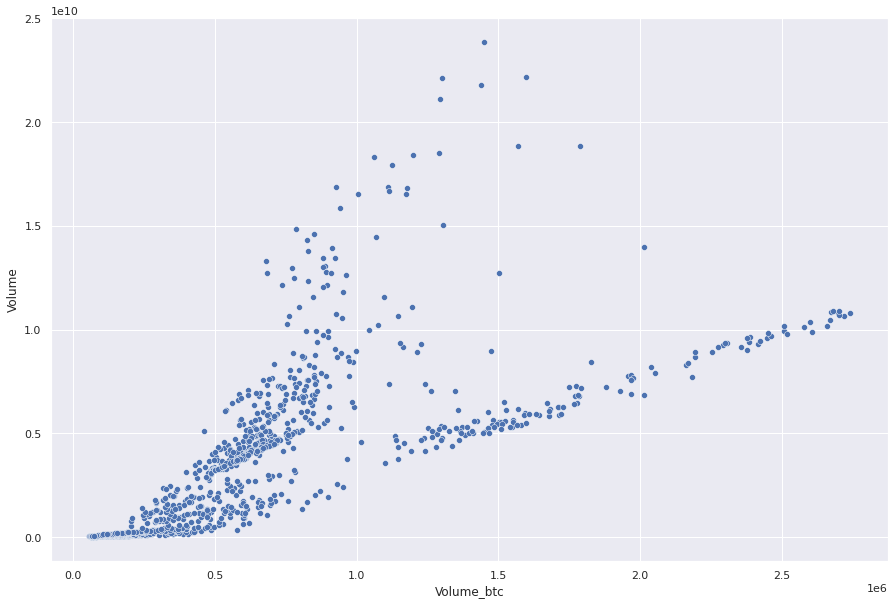

In [75]:
# é interessante notar que além do comportamento óbvio (o volume de bitcoins negociados se traduzindo de maneira relativamente linear com o volume de dinheiro negociado),
# temos "4/5 faixas principais", podemos confirmar a existência dessa tendência de agrupamento por meio de histogramas / KMeans para pegar o coeficiente angular dessas retas
sns.scatterplot(x=dfMaxMin_perDay["Volume_btc"], y=dfMaxMin_perDay["Volume"])

In [76]:
tmp = (dfMaxMin_perDay["Volume"] / dfMaxMin_perDay["Volume_btc"])

(array([334., 103.,  52.,  15.,  15.,  38.,  25.,  16.,  60.,  85.,  30.,
          7.,   2.,  13.,  14.,  73.,  60.,  29.,  32.,  13.,  30.,  18.,
         17.,  12.,   8.,   7.,   8.,   9.,   8.,   7.,   2.,   1.,   0.,
          1.,   5.,   5.,   4.,   3.,   5.,   1.,   2.,   4.,   3.,   2.,
          2.,   0.,   1.,   1.,   1.,   1.]),
 array([  371.4975125 ,   754.69855834,  1137.89960418,  1521.10065002,
         1904.30169586,  2287.5027417 ,  2670.70378754,  3053.90483338,
         3437.10587922,  3820.30692506,  4203.5079709 ,  4586.70901674,
         4969.91006258,  5353.11110842,  5736.31215426,  6119.5132001 ,
         6502.71424594,  6885.91529178,  7269.11633762,  7652.31738346,
         8035.5184293 ,  8418.71947514,  8801.92052098,  9185.12156682,
         9568.32261266,  9951.5236585 , 10334.72470434, 10717.92575018,
        11101.12679602, 11484.32784186, 11867.5288877 , 12250.72993354,
        12633.93097938, 13017.13202522, 13400.33307106, 13783.5341169 ,
        14

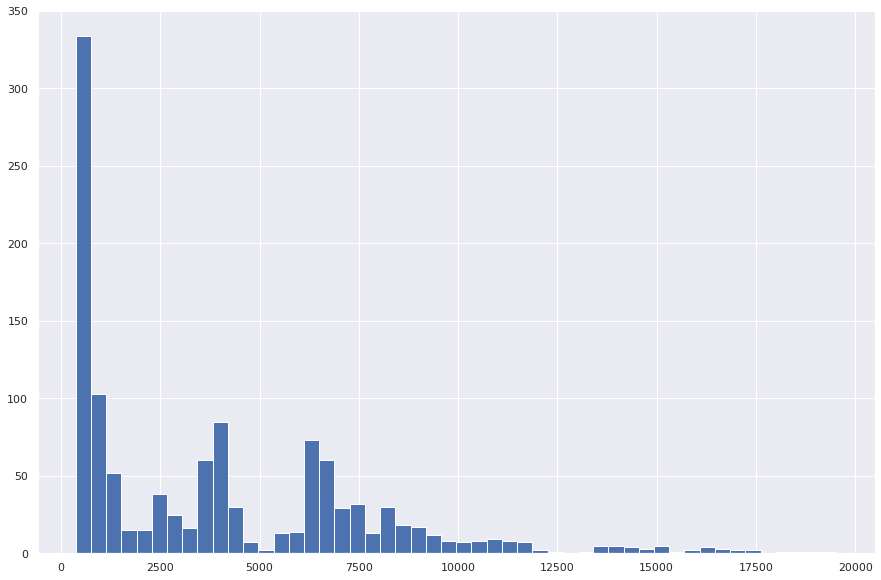

In [77]:
# podemos ver pelo histograma abaixo que temos algumas faixas mais comuns que outras, por exemplo o valor de coeficiente angular = 2 praticamente não existe, mas existe com 1.5 e com 2.4
# isso são as faixas que podem ser vistas acima
plt.hist(tmp, bins=50)

In [86]:
from sklearn.cluster import KMeans

In [87]:
km = KMeans(n_clusters=5, init = np.array([700, 2500, 4000, 6500, 10000]).reshape(5, 1))

In [88]:
km.fit(tmp.to_numpy().reshape(-1, 1))

KMeans(init=array([[  700],
       [ 2500],
       [ 4000],
       [ 6500],
       [10000]]),
       n_clusters=5)

In [89]:
# esses podem ser considerados os coeficientes angulares das 4 retas dos dados acima
km.cluster_centers_.ravel()

array([  699.02230135,  2404.63705083,  4014.17700662,  7373.25648674,
       13559.87807291])

In [90]:
predictions = km.predict(tmp.to_numpy().reshape(-1, 1))

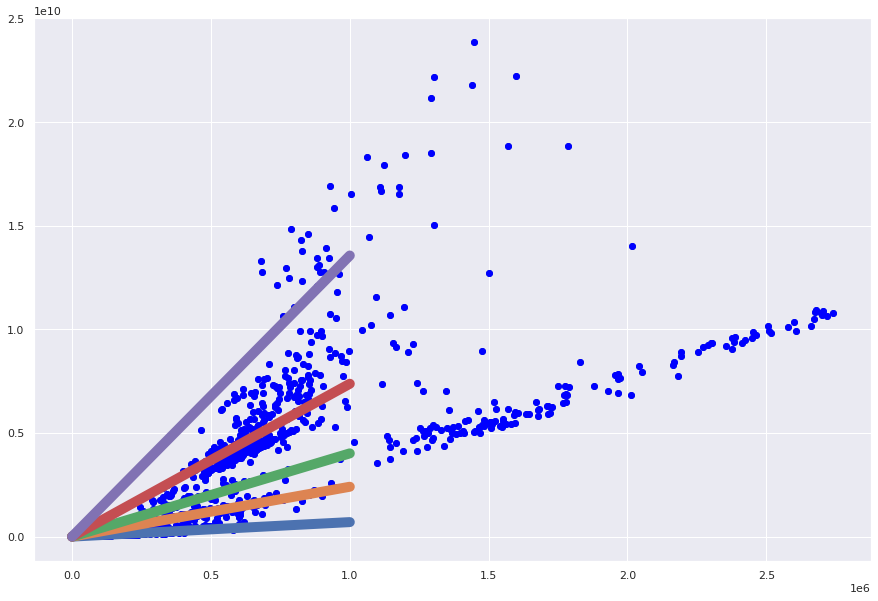

In [91]:
plt.scatter(dfMaxMin_perDay["Volume_btc"], dfMaxMin_perDay["Volume"])
tv = np.linspace(0, int(1e6), int(1e4))
for m in km.cluster_centers_.ravel():
    plt.plot(tv, [m * ti for ti in tv], linewidth=10)
plt.scatter(dfMaxMin_perDay["Volume_btc"], dfMaxMin_perDay["Volume"], color = "blue")

In [92]:
dfMaxMin_perDay["grupo_currencyvolume"] = predictions

<AxesSubplot:xlabel='Timestamp', ylabel='Close'>

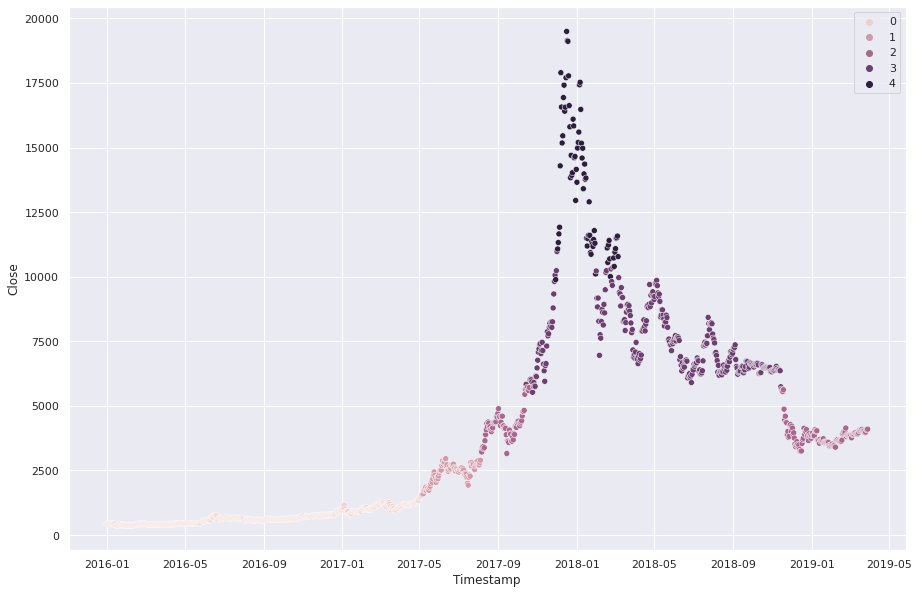

In [94]:
# o bitcoin tem "patamares" de preço, o coeficiente angular do gráfico acima é basicamente o preço do bitcoin (com algumas exceções!, ver que gráfico abaixo em que alguns dias tem vizinhos de cores diferentes),
# isso mostra que o preço não é exatamente uniformemente distribuido
# a moeda passa um tempo com um certo patamar e depois muda para outro rapidamente, essas variações são abruptas, de forma que alguns coeficientes angulares no gráfico acima não apareçam
sns.scatterplot(x=dfMaxMin_perDay.index, y=dfMaxMin_perDay["Close"], hue = predictions)

<AxesSubplot:xlabel='Volume_btc', ylabel='variacao'>

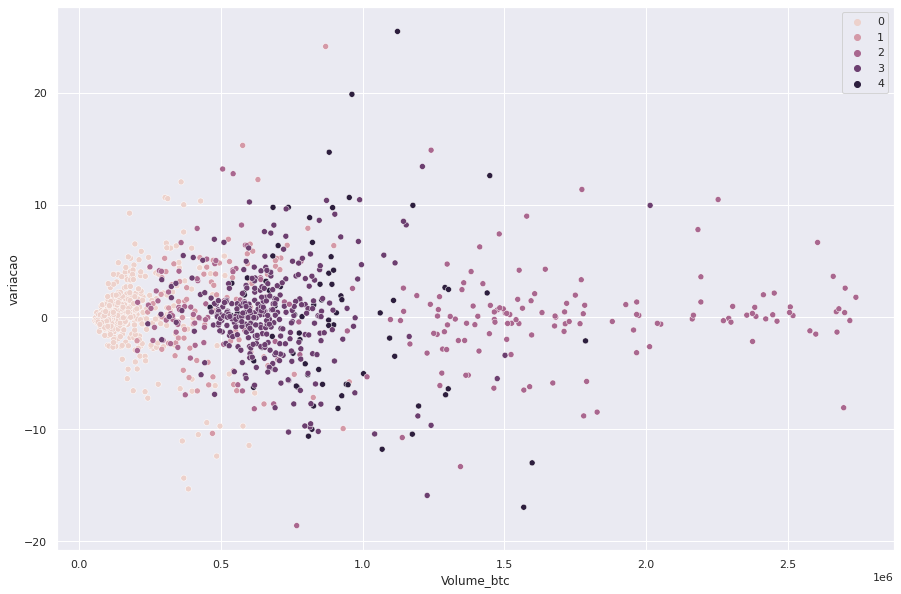

In [97]:
# podemos tentar usar essas categorias de patameres para ver alguma tendência/correlação
# volume x variacao
sns.scatterplot(x=dfMaxMin_perDay["Volume_btc"], y=dfMaxMin_perDay["variacao"], hue = predictions)

<AxesSubplot:xlabel='Volume_btc', ylabel='Close'>

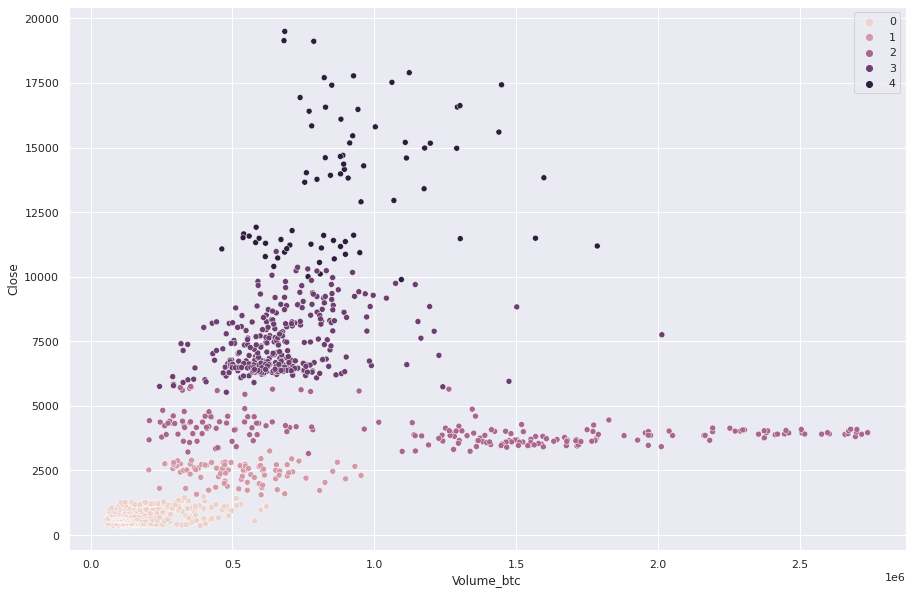

In [98]:
# claro que o valor de close_max vai estar fortemente correlacionado, ainda assim esses grupos que achamos indicam tendências, vemos que a dispersão de cada uma
# parece manter pouca dependência com outros grupos, de qualquer forma esses grupos parecem ser relevantes para correlações e análise do comportamento do bitcoin
sns.scatterplot(x=dfMaxMin_perDay["Volume_btc"], y=dfMaxMin_perDay["Close"], hue = predictions)

<AxesSubplot:xlabel='Volume_btc', ylabel='variacao'>

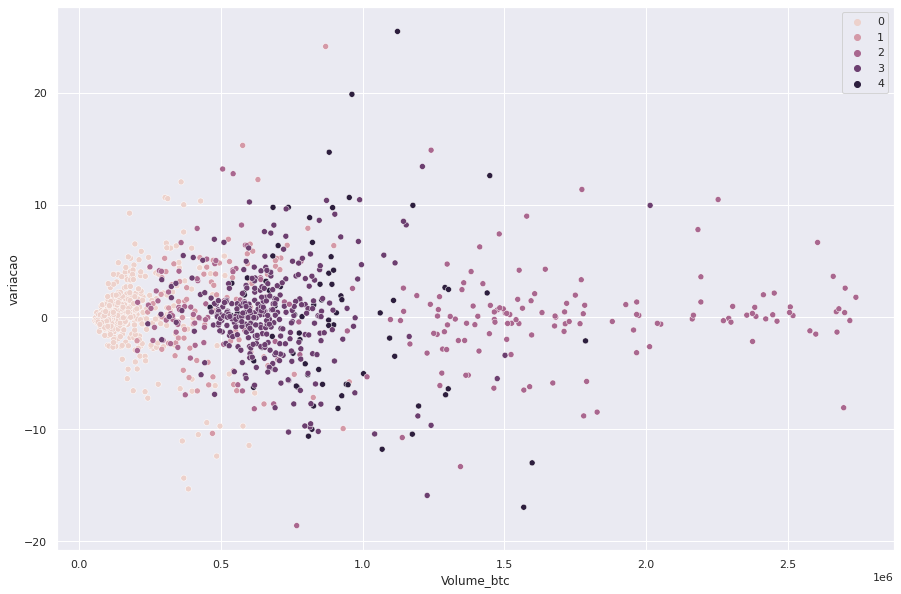

In [99]:
sns.scatterplot(x=dfMaxMin_perDay["Volume_btc"], y=dfMaxMin_perDay["variacao"], hue = predictions)

<AxesSubplot:xlabel='Timestamp', ylabel='variacao'>

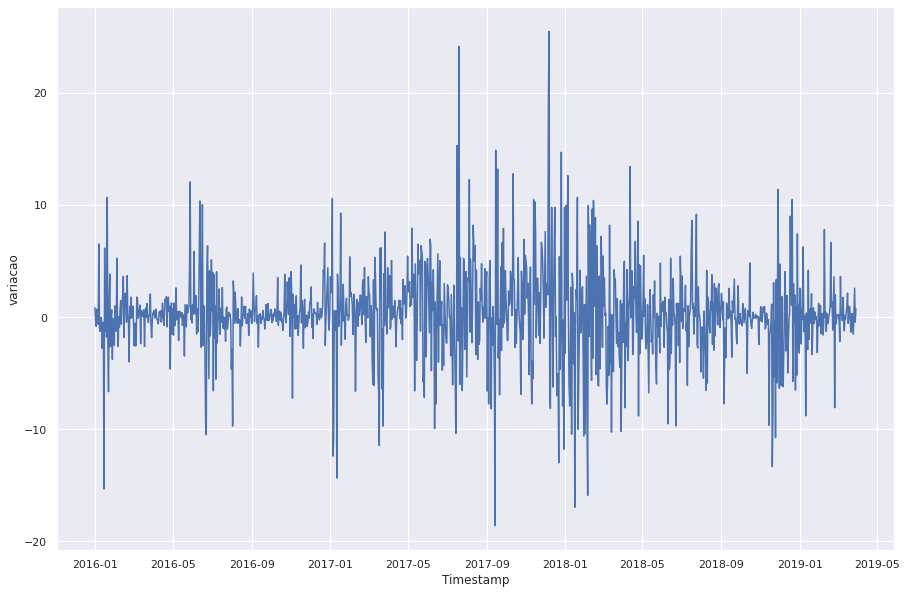

In [101]:
sns.lineplot(data = dfMaxMin_perDay, x = "Timestamp", y = "variacao")

In [103]:
# alguns dias possuem variações atípicas de valor de abertura/fechamento max/min

dfMaxMin_perDay[abs(dfMaxMin_perDay["variacao"]) > 15]

,Open,High,Low,Close,Adj Close,Volume,variacao,Volume_btc,grupo_currencyvolume
Timestamp,,,,,,,,,
2016-01-15,430.255005,430.255005,364.330994,364.330994,364.330994,1.533510e+08,-15.322079,3.859897e+05,0
2017-07-17,1932.619995,2230.489990,1932.619995,2228.409912,2228.409912,1.201760e+09,15.305126,5.773376e+05,1
2017-07-20,2269.889893,2900.699951,2269.889893,2817.600098,2817.600098,2.249260e+09,24.129373,8.700207e+05,1
2017-09-14,3875.370117,3920.600098,3153.860107,3154.949951,3154.949951,2.716310e+09,-18.589713,7.679201e+05,2
2017-12-06,11923.400391,14369.099609,11923.400391,14291.500000,14291.500000,1.265630e+10,19.860942,9.627308e+05,4
2017-12-07,14266.099609,17899.699219,14057.299805,17899.699219,17899.699219,1.795070e+10,25.470169,1.123428e+06,4
2018-01-16,13836.099609,13843.099609,10194.900391,11490.500000,11490.500000,1.885380e+10,-16.952752,1.568666e+06,4
2018-02-05,8270.540039,8364.839844,6756.680176,6955.270020,6955.270020,9.285290e+09,-15.903073,1.228090e+06,3


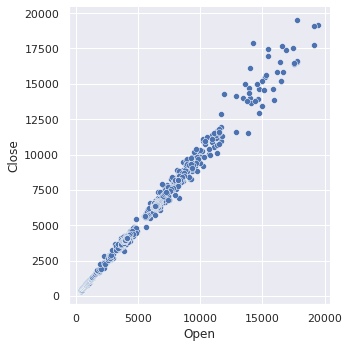

In [104]:
## claramente open_min e close_max não podem ter uma variação muito grande, y \approx x
sns.relplot(x="Open", y="Close", data=dfMaxMin_perDay)

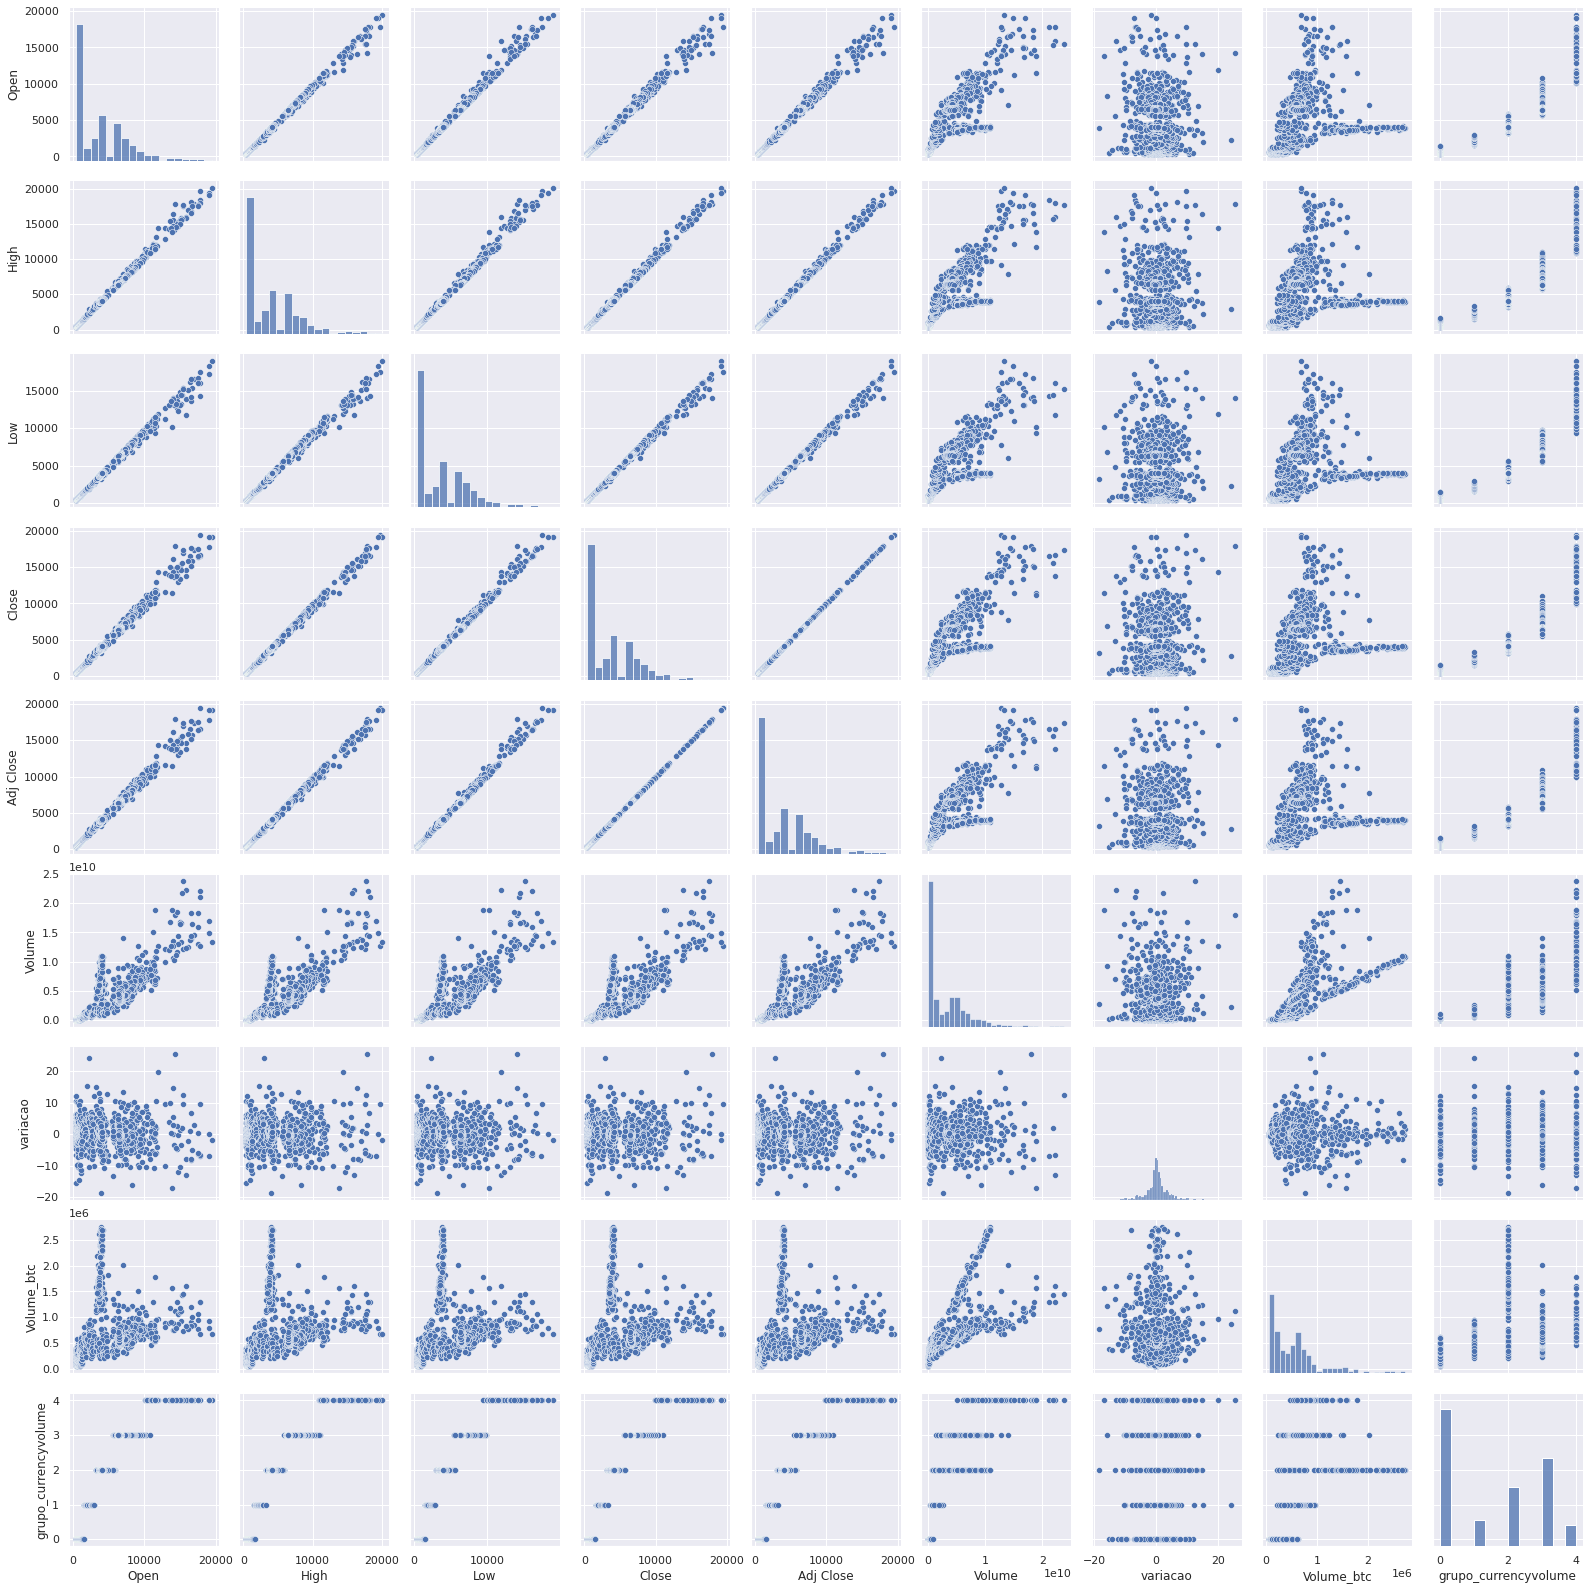

In [105]:
sns.pairplot(dfMaxMin_perDay)

**Tweets Bitcoin**

In [106]:
# https://www.kaggle.com/alaix14/bitcoin-tweets-20160101-to-20190329
import random

p = 0.005

dfTweets = pd.read_csv('Data/tweets.csv',delimiter=';', skiprows=lambda i: i>0 and random.random() > p, lineterminator='\n' )
dfTweets

,id,user,fullname,url,timestamp,replies,likes,retweets,text\r
0,1.126820e+18,TxHodlEm,Texas HodlEm,NaN,2019-05-10 10:03:54+00,0,0,1,Bitcoin FUDsters RN https://t.co/Yxo3TCxQci\r
1,1.132980e+18,yoshino_coin,yoshino,NaN,2019-05-27 12:02:28+00,0,0,0,焼けた笑\nさすがBTC頭おかしい…笑\r
2,1.132965e+18,CoinDeskMarkets,CoinDesk Markets,NaN,2019-05-27 11:02:17+00,11,167,57,Bitcoin has retreated from 12-month highs over...
3,1.132979e+18,npotaz,Nick Potaczek,NaN,2019-05-27 11:56:26+00,0,0,0,"WTF. Find this dude, and give him the same tre..."
4,1.132733e+18,27ketex27,umutsarı,NaN,2019-05-26 19:40:57+00,7,204,66,Dün gece $btc ne denmiş https://t.co/Ik1UuwzSEE\r
...,...,...,...,...,...,...,...,...,...
84615,1.198260e+18,xmr_btc,XMRToBTC,NaN,2019-11-23 15:20:01+00,0,0,0,A $XMR is worth 0.00704655 BTC\r
84616,1.198262e+18,CryptoTurn,#CryptoTurn,NaN,2019-11-23 15:26:35+00,0,0,0,L'XRP serait moins exploité que le Bitcoin dan...
84617,1.198262e+18,AldersonBSV,Elliotˢᵛ,NaN,2019-11-23 15:27:01+00,0,0,0,"@ChicoCrypto when you see the truth, its easy ..."
84618,1.198263e+18,redsmithredsmi1,なみ☆仮想通貨,NaN,2019-11-23 15:31:01+00,0,0,0,BTC\n\n4時間足において再度下ひげハンマーが形成されました。\n\n2日前の日足に引き...


In [107]:
dfTweets['date'] = pd.to_datetime(dfTweets['timestamp'],format= '%Y-%m-%d').dt.date

In [108]:
dfTweets.columns = ["id", "user", "fullname", "url", "timestamp", "replies","likes","retweets","text","date"]

In [109]:
%%time
#vê um melhor
import langid
#langid.classify("Soy muy")
dfTweets['Language'] = dfTweets['text'].apply(lambda x: langid.classify(x)[0])
dfTweets

CPU times: user 11min 49s, sys: 10min 21s, total: 22min 11s
Wall time: 3min 15s


,id,user,fullname,url,timestamp,replies,likes,retweets,text,date,Language
0,1.126820e+18,TxHodlEm,Texas HodlEm,NaN,2019-05-10 10:03:54+00,0,0,1,Bitcoin FUDsters RN https://t.co/Yxo3TCxQci\r,2019-05-10,en
1,1.132980e+18,yoshino_coin,yoshino,NaN,2019-05-27 12:02:28+00,0,0,0,焼けた笑\nさすがBTC頭おかしい…笑\r,2019-05-27,ja
2,1.132965e+18,CoinDeskMarkets,CoinDesk Markets,NaN,2019-05-27 11:02:17+00,11,167,57,Bitcoin has retreated from 12-month highs over...,2019-05-27,en
3,1.132979e+18,npotaz,Nick Potaczek,NaN,2019-05-27 11:56:26+00,0,0,0,"WTF. Find this dude, and give him the same tre...",2019-05-27,en
4,1.132733e+18,27ketex27,umutsarı,NaN,2019-05-26 19:40:57+00,7,204,66,Dün gece $btc ne denmiş https://t.co/Ik1UuwzSEE\r,2019-05-26,tr
...,...,...,...,...,...,...,...,...,...,...,...
84615,1.198260e+18,xmr_btc,XMRToBTC,NaN,2019-11-23 15:20:01+00,0,0,0,A $XMR is worth 0.00704655 BTC\r,2019-11-23,en
84616,1.198262e+18,CryptoTurn,#CryptoTurn,NaN,2019-11-23 15:26:35+00,0,0,0,L'XRP serait moins exploité que le Bitcoin dan...,2019-11-23,fr
84617,1.198262e+18,AldersonBSV,Elliotˢᵛ,NaN,2019-11-23 15:27:01+00,0,0,0,"@ChicoCrypto when you see the truth, its easy ...",2019-11-23,en
84618,1.198263e+18,redsmithredsmi1,なみ☆仮想通貨,NaN,2019-11-23 15:31:01+00,0,0,0,BTC\n\n4時間足において再度下ひげハンマーが形成されました。\n\n2日前の日足に引き...,2019-11-23,ja


In [110]:
#limpar para EN
dfTweets = dfTweets[dfTweets['Language']=='en']
dfTweets

,id,user,fullname,url,timestamp,replies,likes,retweets,text,date,Language
0,1.126820e+18,TxHodlEm,Texas HodlEm,NaN,2019-05-10 10:03:54+00,0,0,1,Bitcoin FUDsters RN https://t.co/Yxo3TCxQci\r,2019-05-10,en
2,1.132965e+18,CoinDeskMarkets,CoinDesk Markets,NaN,2019-05-27 11:02:17+00,11,167,57,Bitcoin has retreated from 12-month highs over...,2019-05-27,en
3,1.132979e+18,npotaz,Nick Potaczek,NaN,2019-05-27 11:56:26+00,0,0,0,"WTF. Find this dude, and give him the same tre...",2019-05-27,en
5,1.132979e+18,d_mazurek524,Dan Mazurek,NaN,2019-05-27 11:57:39+00,0,0,0,@Lowes ganna fomo into accepting $BTC when in ...,2019-05-27,en
6,1.132955e+18,mef_btc,bitcoin,NaN,2019-05-27 10:21:49+00,0,2,3,You can watch how investing work !\nOn YOUTUBE...,2019-05-27,en
...,...,...,...,...,...,...,...,...,...,...,...
84613,1.198255e+18,wpeace4886,TWpeace4886,NaN,2019-11-23 15:01:54+00,0,0,0,"10My child, for those that pursue you for rewa...",2019-11-23,en
84614,1.198259e+18,Aquila_PH,AquilaPH,NaN,2019-11-23 15:15:31+00,0,0,0,$BTC Two possible options for me.\n\n#Crypto #...,2019-11-23,en
84615,1.198260e+18,xmr_btc,XMRToBTC,NaN,2019-11-23 15:20:01+00,0,0,0,A $XMR is worth 0.00704655 BTC\r,2019-11-23,en
84617,1.198262e+18,AldersonBSV,Elliotˢᵛ,NaN,2019-11-23 15:27:01+00,0,0,0,"@ChicoCrypto when you see the truth, its easy ...",2019-11-23,en


In [111]:
%%time
sentimental = [sentiment_scores(i) for i in dfTweets['text']]

dfTweets["Sentimento"] = sentimental
dfTweets

CPU times: user 7min 2s, sys: 6.85 s, total: 7min 8s
Wall time: 7min 11s


,id,user,fullname,url,timestamp,replies,likes,retweets,text,date,Language,Sentimento
0,1.126820e+18,TxHodlEm,Texas HodlEm,NaN,2019-05-10 10:03:54+00,0,0,1,Bitcoin FUDsters RN https://t.co/Yxo3TCxQci\r,2019-05-10,en,Neutral
2,1.132965e+18,CoinDeskMarkets,CoinDesk Markets,NaN,2019-05-27 11:02:17+00,11,167,57,Bitcoin has retreated from 12-month highs over...,2019-05-27,en,Positive
3,1.132979e+18,npotaz,Nick Potaczek,NaN,2019-05-27 11:56:26+00,0,0,0,"WTF. Find this dude, and give him the same tre...",2019-05-27,en,Negative
5,1.132979e+18,d_mazurek524,Dan Mazurek,NaN,2019-05-27 11:57:39+00,0,0,0,@Lowes ganna fomo into accepting $BTC when in ...,2019-05-27,en,Positive
6,1.132955e+18,mef_btc,bitcoin,NaN,2019-05-27 10:21:49+00,0,2,3,You can watch how investing work !\nOn YOUTUBE...,2019-05-27,en,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
84613,1.198255e+18,wpeace4886,TWpeace4886,NaN,2019-11-23 15:01:54+00,0,0,0,"10My child, for those that pursue you for rewa...",2019-11-23,en,Positive
84614,1.198259e+18,Aquila_PH,AquilaPH,NaN,2019-11-23 15:15:31+00,0,0,0,$BTC Two possible options for me.\n\n#Crypto #...,2019-11-23,en,Neutral
84615,1.198260e+18,xmr_btc,XMRToBTC,NaN,2019-11-23 15:20:01+00,0,0,0,A $XMR is worth 0.00704655 BTC\r,2019-11-23,en,Positive
84617,1.198262e+18,AldersonBSV,Elliotˢᵛ,NaN,2019-11-23 15:27:01+00,0,0,0,"@ChicoCrypto when you see the truth, its easy ...",2019-11-23,en,Positive


In [112]:
del dfTweets['id']

In [113]:
dfTweets

,user,fullname,url,timestamp,replies,likes,retweets,text,date,Language,Sentimento
0,TxHodlEm,Texas HodlEm,NaN,2019-05-10 10:03:54+00,0,0,1,Bitcoin FUDsters RN https://t.co/Yxo3TCxQci\r,2019-05-10,en,Neutral
2,CoinDeskMarkets,CoinDesk Markets,NaN,2019-05-27 11:02:17+00,11,167,57,Bitcoin has retreated from 12-month highs over...,2019-05-27,en,Positive
3,npotaz,Nick Potaczek,NaN,2019-05-27 11:56:26+00,0,0,0,"WTF. Find this dude, and give him the same tre...",2019-05-27,en,Negative
5,d_mazurek524,Dan Mazurek,NaN,2019-05-27 11:57:39+00,0,0,0,@Lowes ganna fomo into accepting $BTC when in ...,2019-05-27,en,Positive
6,mef_btc,bitcoin,NaN,2019-05-27 10:21:49+00,0,2,3,You can watch how investing work !\nOn YOUTUBE...,2019-05-27,en,Positive
...,...,...,...,...,...,...,...,...,...,...,...
84613,wpeace4886,TWpeace4886,NaN,2019-11-23 15:01:54+00,0,0,0,"10My child, for those that pursue you for rewa...",2019-11-23,en,Positive
84614,Aquila_PH,AquilaPH,NaN,2019-11-23 15:15:31+00,0,0,0,$BTC Two possible options for me.\n\n#Crypto #...,2019-11-23,en,Neutral
84615,xmr_btc,XMRToBTC,NaN,2019-11-23 15:20:01+00,0,0,0,A $XMR is worth 0.00704655 BTC\r,2019-11-23,en,Positive
84617,AldersonBSV,Elliotˢᵛ,NaN,2019-11-23 15:27:01+00,0,0,0,"@ChicoCrypto when you see the truth, its easy ...",2019-11-23,en,Positive


<AxesSubplot:xlabel='Sentimento', ylabel='Count'>

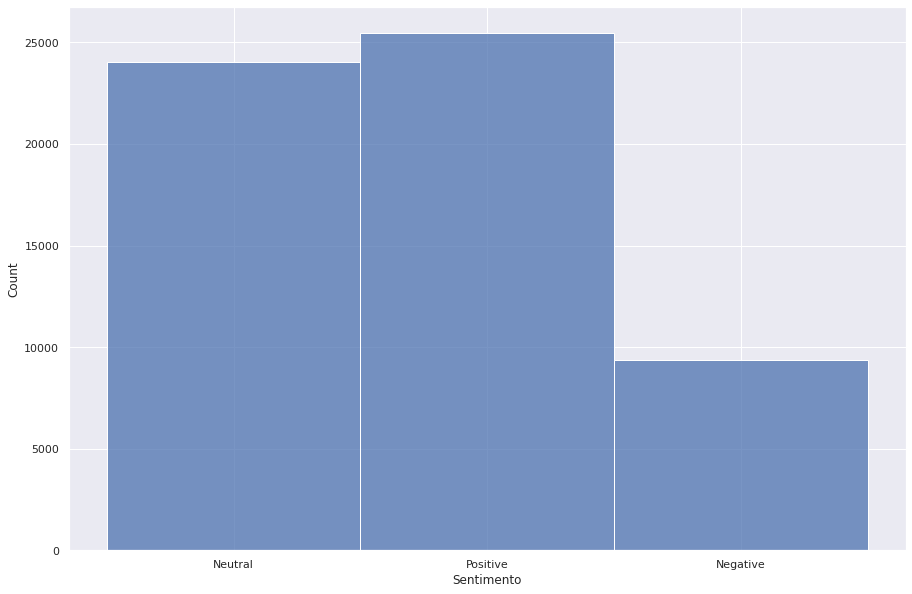

In [114]:
sns.histplot(data = dfTweets["Sentimento"])

In [115]:
dfTweets.groupby("Sentimento").mean()

,replies,likes,retweets
Sentimento,,,
Negative,0.468387,4.304830,1.221132
Neutral,0.178463,1.721674,0.820996
Positive,0.455305,3.143541,1.197967


In [116]:
dfTweets.groupby("Sentimento").sum()

,replies,likes,retweets
Sentimento,,,
Negative,4393,40375,11453
Neutral,4289,41377,19731
Positive,11603,80110,30529


In [117]:
dfTweets.groupby("date").sum()

,replies,likes,retweets
date,,,
2011-05-24,0,0,1
2012-01-03,0,0,0
2012-01-04,0,0,0
2012-01-08,0,0,0
2012-01-22,0,0,0
...,...,...,...
2019-11-19,65,766,115
2019-11-20,154,416,223
2019-11-21,8,87,33


In [118]:
dfResumoDiario = pd.concat([dfTweets.groupby("date").sum(), dfMaxMin_perDay['variacao']], axis=1).dropna()
dfResumoDiario

,replies,likes,retweets,variacao
2016-01-01,0.0,0.0,0.0,0.838828
2016-01-03,0.0,0.0,0.0,-0.822693
2016-01-04,0.0,0.0,0.0,0.704551
2016-01-05,0.0,0.0,0.0,-0.256081
2016-01-06,0.0,0.0,1.0,-0.637013
...,...,...,...,...
2019-03-25,0.0,1.0,0.0,-1.516912
2019-03-26,0.0,1.0,0.0,0.399374
2019-03-27,0.0,0.0,0.0,2.580697
2019-03-28,4.0,34.0,15.0,-0.452035


In [119]:
#mudar isso e deixar de forma melhor
dfResumoDiario['Positivo']  = dfTweets[dfTweets['Sentimento']=='Positive'].groupby("date").count()['Sentimento']
dfResumoDiario['Negative']  = dfTweets[dfTweets['Sentimento']=='Negative'].groupby("date").count()['Sentimento']
dfResumoDiario['Neutral']  = dfTweets[dfTweets['Sentimento']=='Neutral'].groupby("date").count()['Sentimento']
dfResumoDiario = dfResumoDiario.fillna(0)
dfResumoDiario

,replies,likes,retweets,variacao,Positivo,Negative,Neutral
2016-01-01,0.0,0.0,0.0,0.838828,0.0,1.0,3.0
2016-01-03,0.0,0.0,0.0,-0.822693,0.0,0.0,1.0
2016-01-04,0.0,0.0,0.0,0.704551,0.0,1.0,1.0
2016-01-05,0.0,0.0,0.0,-0.256081,1.0,0.0,1.0
2016-01-06,0.0,0.0,1.0,-0.637013,1.0,0.0,3.0
...,...,...,...,...,...,...,...
2019-03-25,0.0,1.0,0.0,-1.516912,2.0,0.0,1.0
2019-03-26,0.0,1.0,0.0,0.399374,3.0,0.0,0.0
2019-03-27,0.0,0.0,0.0,2.580697,0.0,1.0,2.0
2019-03-28,4.0,34.0,15.0,-0.452035,7.0,2.0,4.0


In [120]:
dfResumoDiario.describe()

,replies,likes,retweets,variacao,Positivo,Negative,Neutral
count,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000
mean,4.103343,35.089159,16.443769,0.230173,3.286727,1.550152,4.197568
std,22.237047,187.570223,118.346929,4.073782,13.970697,6.704141,14.786598
min,0.000000,0.000000,0.000000,-18.589713,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-1.218146,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.215683,0.000000,0.000000,1.000000
75%,0.000000,1.000000,1.000000,1.600688,1.000000,1.000000,2.000000
max,444.000000,2768.000000,2375.000000,25.470169,164.000000,102.000000,192.000000


In [121]:
#Sem nomalizar
dfResumoDiario.corr()

,replies,likes,retweets,variacao,Positivo,Negative,Neutral
replies,1.000000,0.791325,0.481059,-0.012227,0.535998,0.537915,0.523292
likes,0.791325,1.000000,0.725736,-0.036979,0.421615,0.407357,0.400768
retweets,0.481059,0.725736,1.000000,-0.019088,0.208886,0.198569,0.203328
variacao,-0.012227,-0.036979,-0.019088,1.000000,-0.032249,-0.028351,-0.015455
Positivo,0.535998,0.421615,0.208886,-0.032249,1.000000,0.958604,0.965605
Negative,0.537915,0.407357,0.198569,-0.028351,0.958604,1.000000,0.951528
Neutral,0.523292,0.400768,0.203328,-0.015455,0.965605,0.951528,1.000000


In [122]:
dfResumoDiario.index = pd.to_datetime(dfResumoDiario.index)

In [123]:
# a correlação acima com a variacao já indica a tendência, mas podemos também visualizá-la
# abaixo fazemos uma análise semanal da variação com a quantidade de tweets positivos negativos e neutros
dfResumoFreq = dfResumoDiario.groupby(pd.Grouper(freq='W')).sum()[["variacao", "Positivo", "Negative", "Neutral"]]
dfResumoFreq

,variacao,Positivo,Negative,Neutral
2016-01-03,0.016134,0.0,1.0,4.0
2016-01-10,4.061766,7.0,1.0,10.0
2016-01-17,-14.256258,4.0,1.0,9.0
2016-01-24,13.230074,8.0,0.0,6.0
2016-01-31,-8.388842,5.0,4.0,6.0
...,...,...,...,...
2019-03-03,1.987485,4.0,0.0,13.0
2019-03-10,1.166158,8.0,2.0,9.0
2019-03-17,1.687165,7.0,5.0,6.0
2019-03-24,-0.019073,7.0,5.0,10.0


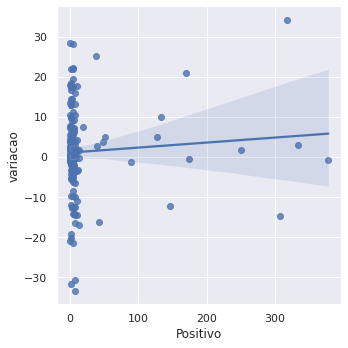

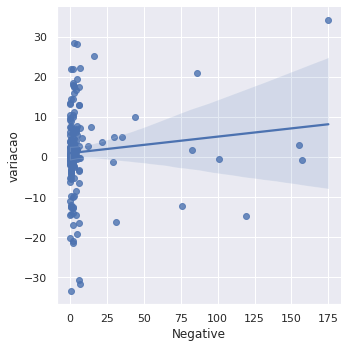

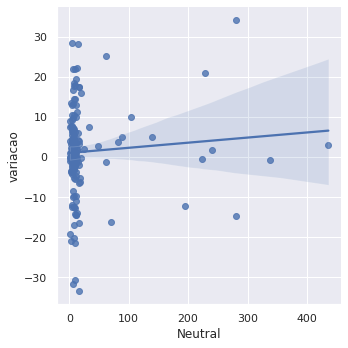

In [124]:
g = sns.lmplot(
    data=dfResumoFreq,
    x="Positivo", y="variacao",
    height=5
)
g = sns.lmplot(
    data=dfResumoFreq,
    x="Negative", y="variacao",
    height=5
)
g = sns.lmplot(
    data=dfResumoFreq,
    x="Neutral", y="variacao",
    height=5
)

In [125]:
dfResumoFreq["RelativeSentiment"] = dfResumoFreq["Positivo"] - dfResumoFreq["Negative"]

<AxesSubplot:>

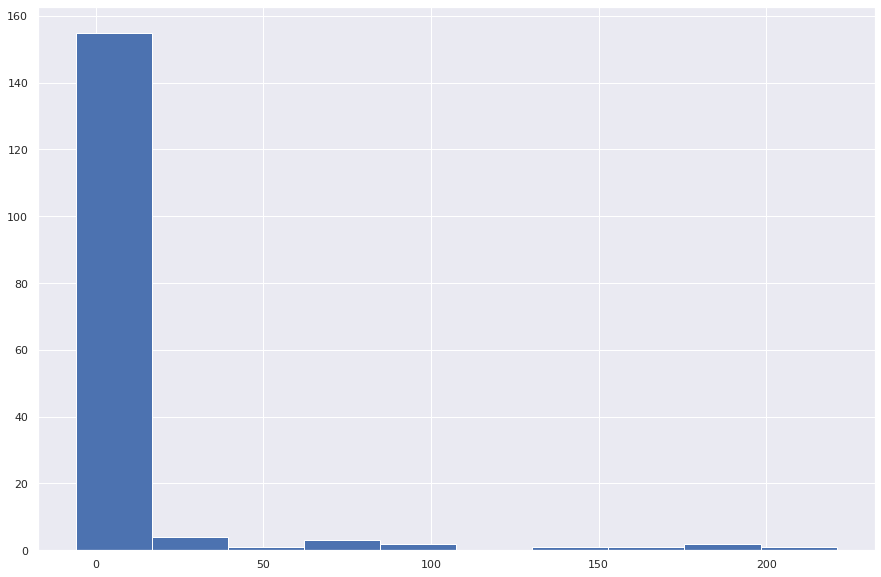

In [126]:
# sequer existe uma distribuição significativa no sentimento médio das mensagens
dfResumoFreq["RelativeSentiment"].hist()

<AxesSubplot:xlabel='RelativeSentiment', ylabel='variacao'>

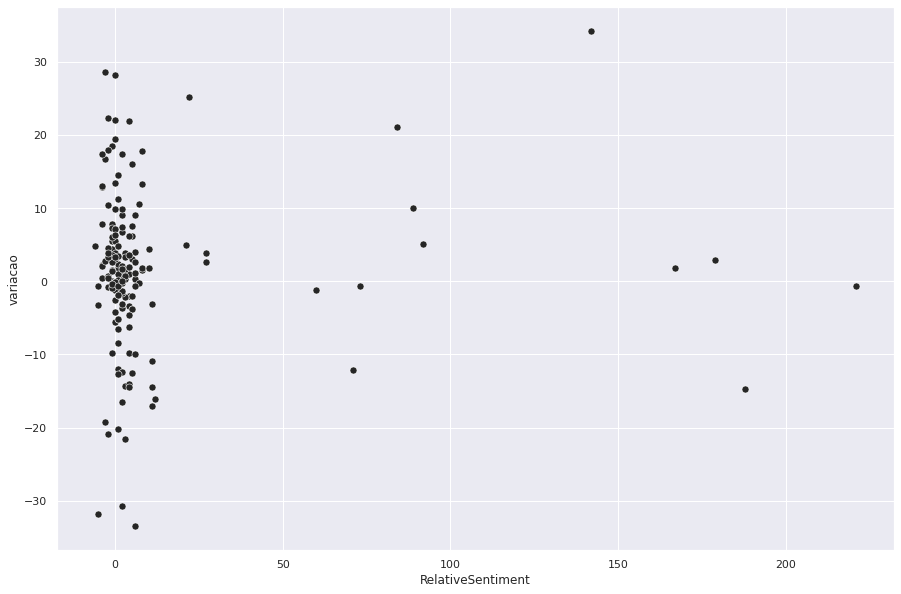

In [127]:
sns.scatterplot(x=dfResumoFreq["RelativeSentiment"], y=dfResumoFreq["variacao"], s=50, color=".15")

In [128]:
#normalizando 
dfResumoDiario_norm = pd.DataFrame()
for i in dfResumoDiario:
    dfResumoDiario_norm[i] = (dfResumoDiario[i] -  dfResumoDiario[i].min())/( dfResumoDiario[i].max() - dfResumoDiario[i].min())
dfResumoDiario_norm.corr()

,replies,likes,retweets,variacao,Positivo,Negative,Neutral
replies,1.000000,0.791325,0.481059,-0.012227,0.535998,0.537915,0.523292
likes,0.791325,1.000000,0.725736,-0.036979,0.421615,0.407357,0.400768
retweets,0.481059,0.725736,1.000000,-0.019088,0.208886,0.198569,0.203328
variacao,-0.012227,-0.036979,-0.019088,1.000000,-0.032249,-0.028351,-0.015455
Positivo,0.535998,0.421615,0.208886,-0.032249,1.000000,0.958604,0.965605
Negative,0.537915,0.407357,0.198569,-0.028351,0.958604,1.000000,0.951528
Neutral,0.523292,0.400768,0.203328,-0.015455,0.965605,0.951528,1.000000
